<a href="https://colab.research.google.com/github/Levelearn/data-analysis/blob/main/correlation_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Libraries**

In [1]:
!pip install ace_tools

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr

**2. Import Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/Levelearn/dataset_levelearn_heart.csv'

df = pd.read_csv(file_path, encoding="latin-1", sep=";")
df.head()

,Timestamp,Email,Nama,NIM,Angkatan,Happiness_Q1,Happiness_Q2,Happiness_Q3,Happiness_Q4,Happiness_Q5,...,TaskSuccess_Q4,TaskSuccess_Q5,Qualitative_Q1,Qualitative_Q2,Qualitative_Q3,Qualitative_Q4,Feedback,Error,Suggestion,File
0,3/26/2025 11:44:39,gloriapanjaitan3012@gmail.com,Gloria Panjaitan,11S23030,2023,5,4,4,5,5,...,4,5,Leaderboard,Tidak,Tidak,Lebih seru dan menarik,Sudah di upload,Sudah di upload,Menambahkan animasi sederhana,https://drive.google.com/open?id=1UWwnVxfv8Sn8...
1,3/26/2025 11:45:03,andresaragih932@gmail.com,Andre Christian Saragih,11S23026,2023,5,5,5,5,5,...,5,5,Point\n\nKarena pointnya dapat ditukarkan dan ...,Tidak,Tidak,Gamifikasi meningkatkan kualitas belajar saya,Sangat bagus,Sudah di uppload,Sudah baik,https://drive.google.com/open?id=1yJpmGPuwsZ1A...
2,3/26/2025 11:45:24,firenoobgaming@gmail.com,Josua,11S23033,2023,3,3,5,4,3,...,3,3,Progress bar,Tidak,Tidak ada sejauh ini,Sama aja,Di foto,Banyak,Ada di foto,https://drive.google.com/open?id=1-51jAdyASsbI...
3,3/26/2025 11:46:16,josuaasrgh@gmail.com,Josua Saragih,11S23028,2023,5,5,4,4,4,...,3,4,Leaderboard,tidak,tidak ada,"lebih seru, dan jadi berpacu untuk belajar",aplikasi nya bagus untuk memacu mahasiswa untu...,1. tombol back tidak berfungsi dengan baik\n2....,UI nya lebih menarik lagi,NaN
4,3/26/2025 11:47:18,christopasaribu90@gmail.com,Christo Pasaribu,11S23005,2023,5,5,5,4,4,...,4,4,"Point, karena ingin menukar nya dengan hadiah",Tidak,Tidak,Sebelum ada fitur gamifikasi tidak ada niatan ...,NaN,Jumlah soal yang benar tidak sesuai dengan jum...,Menurut saya sudah pass mantapp\n,NaN


**3. Data Pre-Processing and Visualization**

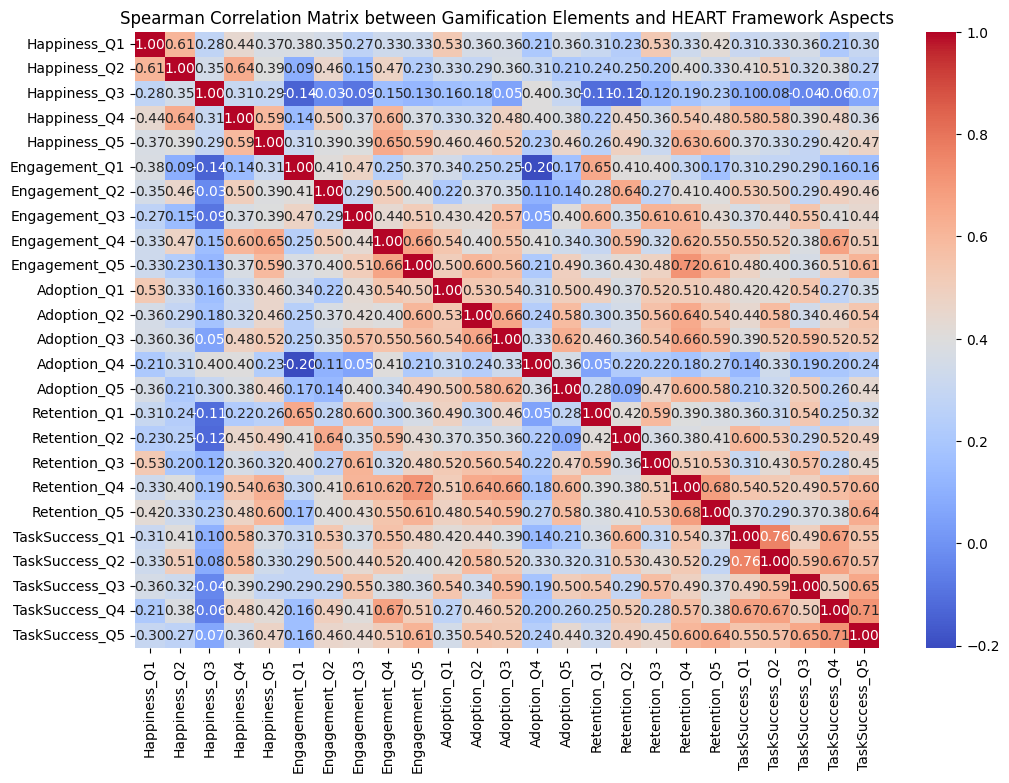

In [5]:
# Elemen gamifikasi (Q1-Q5) dan aspek HEART (Happiness, Engagement, Adoption, Retention, Task Success)
gamification_columns = ['Happiness_Q1', 'Happiness_Q2', 'Happiness_Q3', 'Happiness_Q4', 'Happiness_Q5',
                        'Engagement_Q1', 'Engagement_Q2', 'Engagement_Q3', 'Engagement_Q4', 'Engagement_Q5',
                        'Adoption_Q1', 'Adoption_Q2', 'Adoption_Q3', 'Adoption_Q4', 'Adoption_Q5',
                        'Retention_Q1', 'Retention_Q2', 'Retention_Q3', 'Retention_Q4', 'Retention_Q5',
                        'TaskSuccess_Q1', 'TaskSuccess_Q2', 'TaskSuccess_Q3', 'TaskSuccess_Q4', 'TaskSuccess_Q5']

# Hanya mengambil kolom yang relevan untuk uji korelasi
df_korelasi = df[gamification_columns]

# Melakukan uji korelasi Spearman antara setiap elemen gamifikasi dan aspek HEART
corr_matrix, _ = spearmanr(df_korelasi, axis=0)

# Visualisasi hasil korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=gamification_columns, yticklabels=gamification_columns)
plt.title('Spearman Correlation Matrix between Gamification Elements and HEART Framework Aspects')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


**4. Correlation Test using Spearman**

In [9]:
# Elemen gamifikasi (Leaderboard, Progress Bar, Points, Level, Badge)
gamification_labels = ['Leaderboard', 'Progress Bar', 'Points', 'Level', 'Badge']

# Membagi data menjadi kolom elemen gamifikasi (Q1-Q5) dan aspek HEART (Happiness, Engagement, Adoption, Retention, Task Success)
gamification_data = {
    'Leaderboard': [df['Happiness_Q1'], df['Engagement_Q1'], df['Adoption_Q1'], df['Retention_Q1'], df['TaskSuccess_Q1']],
    'Progress Bar': [df['Happiness_Q2'], df['Engagement_Q2'], df['Adoption_Q2'], df['Retention_Q2'], df['TaskSuccess_Q2']],
    'Points': [df['Happiness_Q3'], df['Engagement_Q3'], df['Adoption_Q3'], df['Retention_Q3'], df['TaskSuccess_Q3']],
    'Level': [df['Happiness_Q4'], df['Engagement_Q4'], df['Adoption_Q4'], df['Retention_Q4'], df['TaskSuccess_Q4']],
    'Badge': [df['Happiness_Q5'], df['Engagement_Q5'], df['Adoption_Q5'], df['Retention_Q5'], df['TaskSuccess_Q5']]
}

# Kolom-kolom yang berhubungan dengan elemen gamifikasi dan aspek HEART
heart_columns = [
    ["Happiness_Q1", "Happiness_Q2", "Happiness_Q3", "Happiness_Q4", "Happiness_Q5"],
    ["Engagement_Q1", "Engagement_Q2", "Engagement_Q3", "Engagement_Q4", "Engagement_Q5"],
    ["Adoption_Q1", "Adoption_Q2", "Adoption_Q3", "Adoption_Q4", "Adoption_Q5"],
    ["Retention_Q1", "Retention_Q2", "Retention_Q3", "Retention_Q4", "Retention_Q5"],
    ["TaskSuccess_Q1", "TaskSuccess_Q2", "TaskSuccess_Q3", "TaskSuccess_Q4", "TaskSuccess_Q5"]
]

# Menghitung korelasi Spearman untuk semua elemen gamifikasi dan aspek HEART (Happiness, Engagement, Adoption, Retention, Task Success)
correlation_results = {}

for element, data in gamification_data.items():
    correlations = [spearmanr(data[i], df[heart_columns[i]])[0] for i in range(5)]
    correlation_results[element] = correlations

# Menyusun hasil korelasi dalam bentuk DataFrame
correlation_df = pd.DataFrame(correlation_results, index=["Happiness", "Engagement", "Adoption", "Retention", "Task Success"])

# Menampilkan hasil korelasi dalam bentuk tabel
display(correlation_df)

,Leaderboard,Progress Bar,Points,Level,Badge
Happiness,"[[0.9999999999999999, 0.9999999999999999, 0.60...","[[1.0, 0.6088930610671903, 1.0, 0.349691909987...","[[1.0, 0.2787529154107397, 0.3496919099878721,...","[[1.0, 0.4410199745251527, 0.6389353995753148,...","[[0.9999999999999999, 0.3707385379292925, 0.39..."
Engagement,"[[1.0, 1.0, 0.4097254003912603, 0.474469320479...","[[1.0, 0.4097254003912603, 1.0, 0.294278171239...","[[1.0, 0.474469320479211, 0.29427817123951217,...","[[1.0, 0.24503881235921315, 0.5037760892072789...","[[1.0, 0.3729801590206076, 0.4010995825028027,..."
Adoption,"[[0.9999999999999999, 0.9999999999999999, 0.53...","[[1.0, 0.5331335731712437, 1.0, 0.657680944885...","[[0.9999999999999999, 0.5386697489041048, 0.65...","[[1.0, 0.3080543867020035, 0.23647583458128524...","[[0.9999999999999999, 0.49994402586988007, 0.5..."
Retention,"[[1.0, 1.0, 0.41610142564079433, 0.59379947373...","[[1.0, 0.41610142564079433, 1.0, 0.36236917568...","[[1.0, 0.5937994737397085, 0.36236917568706695...","[[0.9999999999999999, 0.39426883401166857, 0.3...","[[1.0, 0.3784180033719117, 0.4079128845623767,..."
Task Success,"[[1.0, 1.0, 0.7624886361905959, 0.490405460624...","[[1.0, 0.7624886361905959, 1.0, 0.586152853005...","[[1.0, 0.49040546062426427, 0.5861528530059597...","[[1.0, 0.674982454348695, 0.6736214835450071, ...","[[1.0, 0.5466978420480754, 0.5709224274776618,..."


**5. Visualization using Scatter Plot**

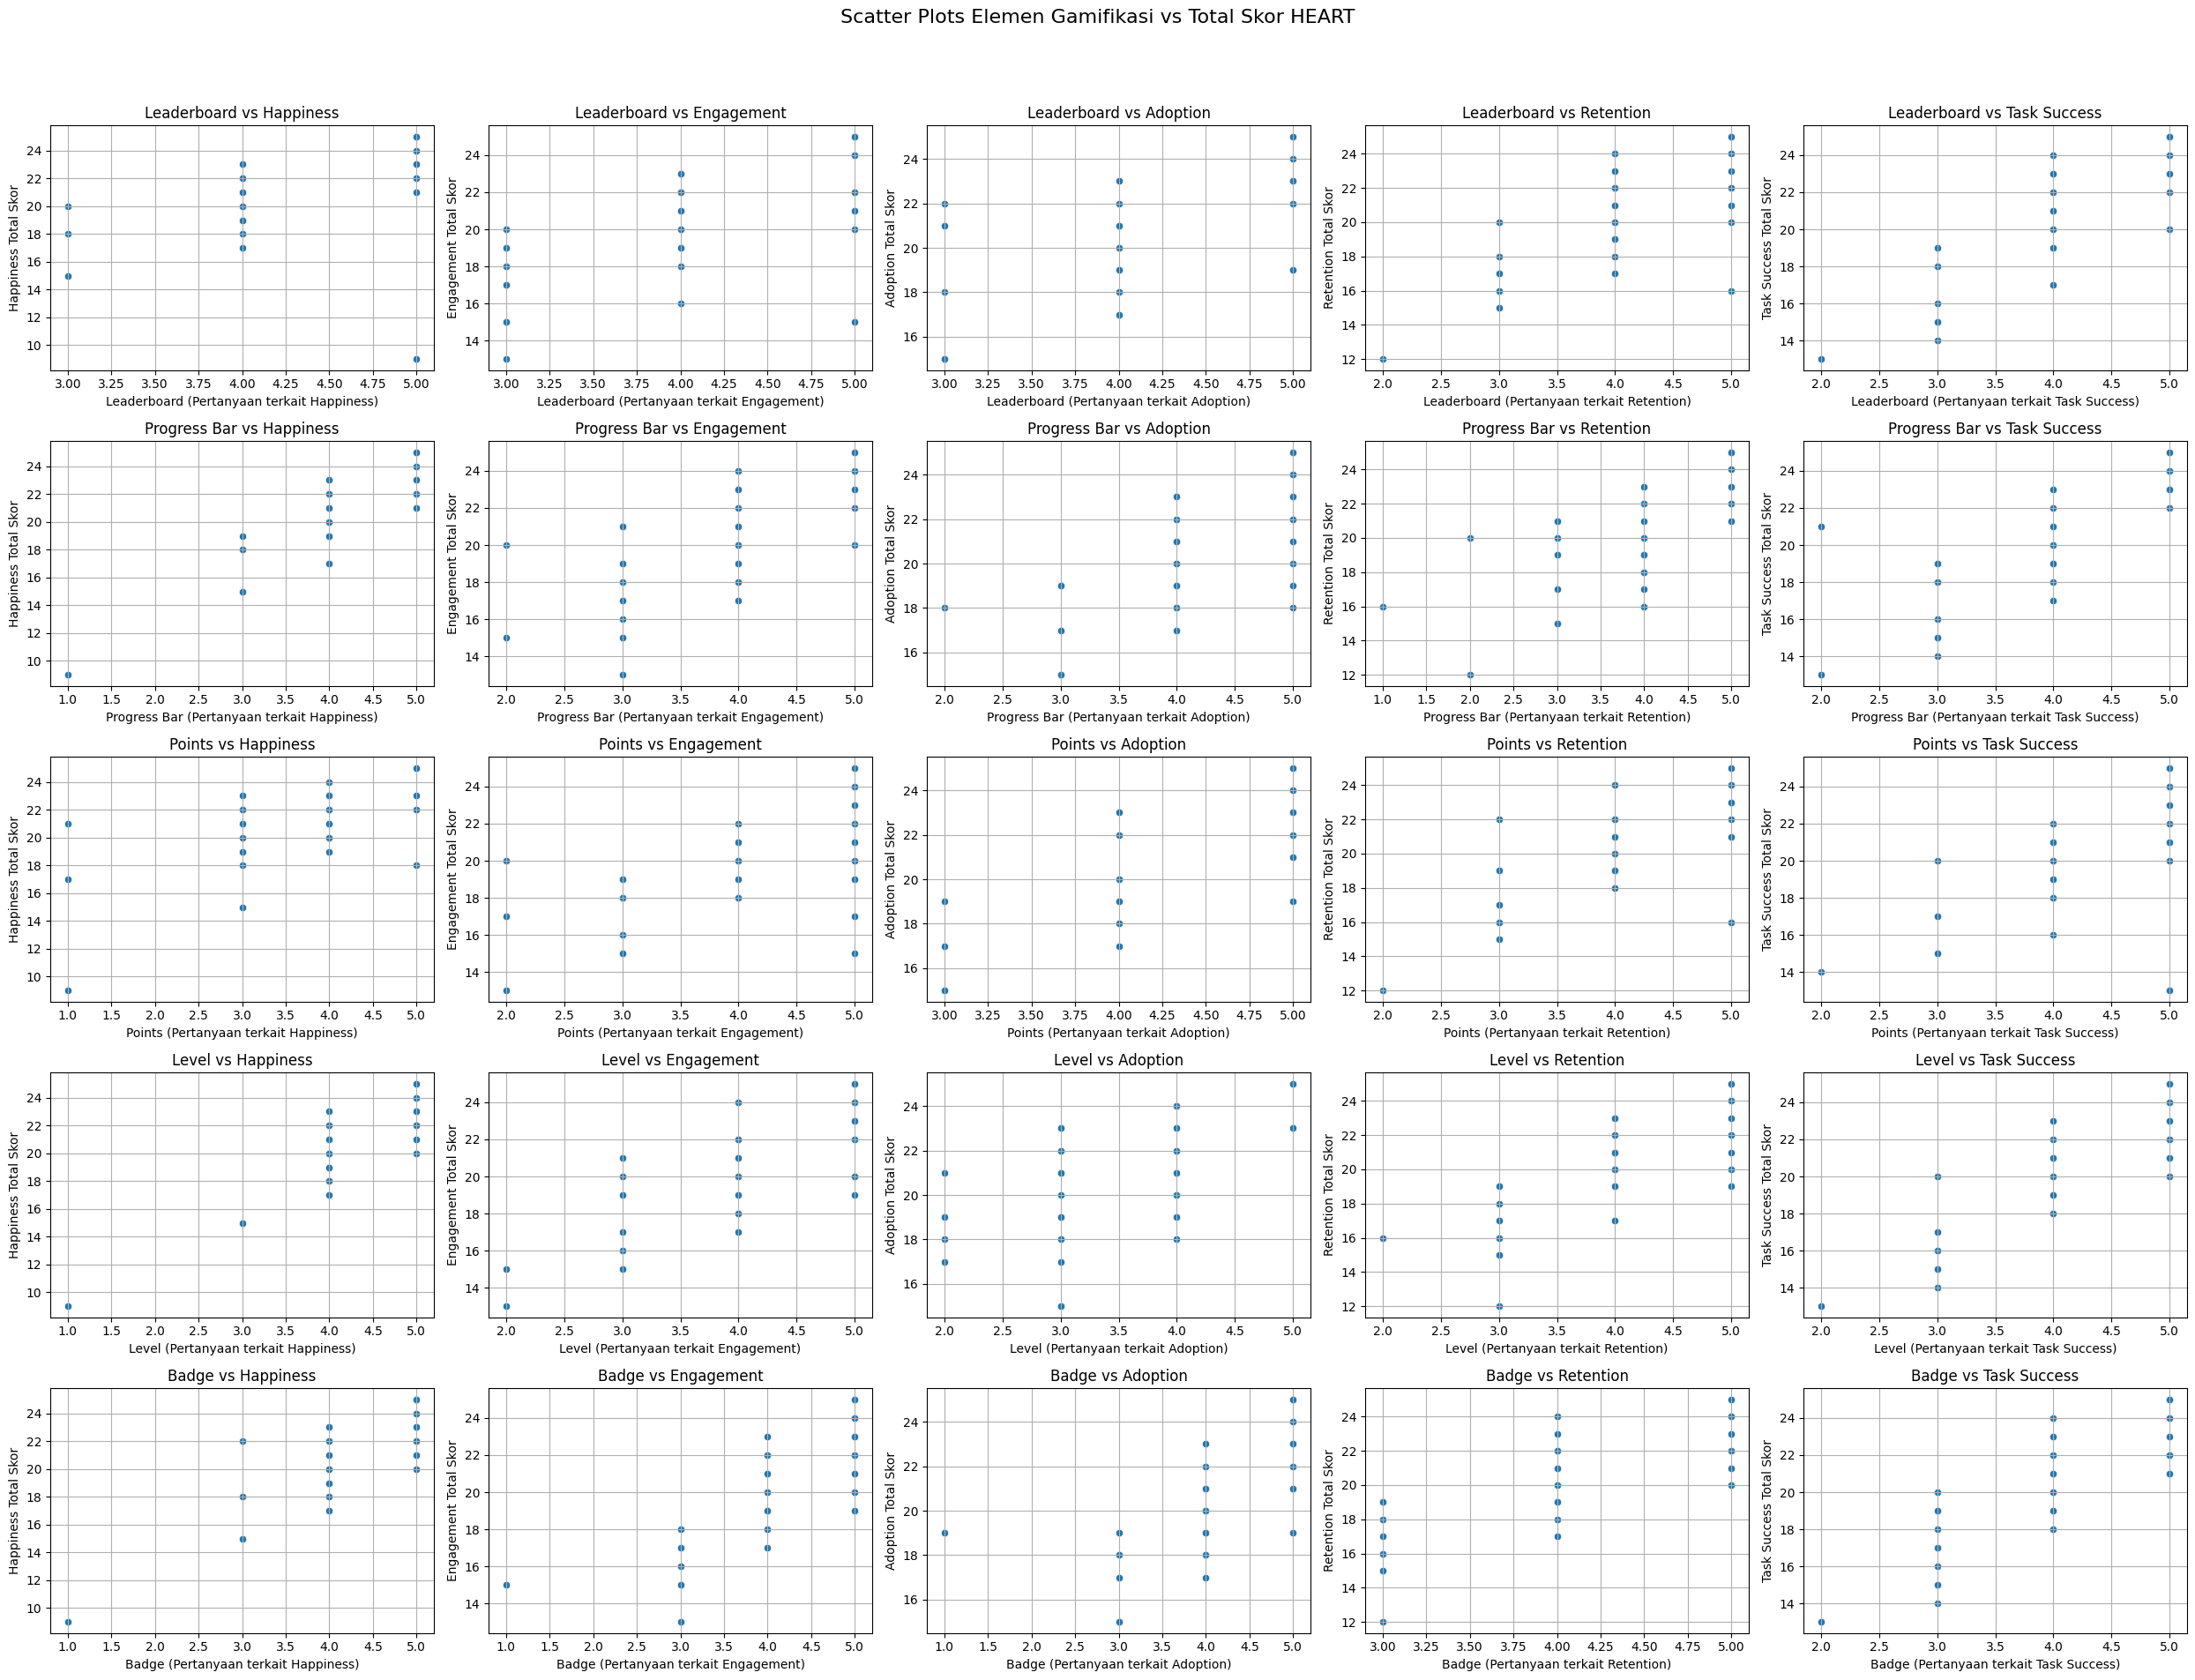

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

aspects = ["Happiness", "Engagement", "Adoption", "Retention", "Task Success"]
num_aspects = len(aspects)
num_elements = len(gamification_data)

fig, axes = plt.subplots(num_elements, num_aspects, figsize=(5 * num_aspects, 4 * num_elements))
fig.suptitle('Scatter Plots Elemen Gamifikasi vs Total Skor HEART', fontsize=16)

for row_idx, (element_name, element_data) in enumerate(gamification_data.items()):
    for col_idx, aspect in enumerate(aspects):
        x = element_data[col_idx]  # skor elemen gamifikasi untuk aspek tersebut
        y = df[heart_columns[col_idx]].sum(axis=1)  # total skor aspek HEART

        ax = axes[row_idx, col_idx]  # Pilih subplot yang sesuai
        sns.scatterplot(x=x, y=y, ax=ax)
        ax.set_title(f'{element_name} vs {aspect}')
        ax.set_xlabel(f'{element_name} (Pertanyaan terkait {aspect})')
        ax.set_ylabel(f'{aspect} Total Skor')
        ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Untuk menyesuaikan judul super
plt.show()